## Marco Antonio Moreira Carujo
Nesse dataset podemos perceber que alunos com bom desempenho final tendem a quer um nivelamento, caso a nota final seja alta o aluno tende a ter notas altas em todas as avaliações do ENEM. Sendo assim com a nota de parte da provamos podemos prever que o aluno terá um bom ou mal desempenho final ou na parte não analisada.

In [80]:
!pip install nb_black -q

In [81]:
%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [82]:
import warnings

warnings.filterwarnings("ignore")

## Formação Machine Learning Alura - Dados do ENEM

Na formação de Machine Learning da www.alura.com.br vamos inicialmente analisar os dados do Enem 2017. O Enem é uma prova aplicada aos alunos que completam o ensino médio, usada como porta de entrada para diversas faculdades no Brasil. A prova é composta de 9 avaliações distintas: Ciências da Natureza, Ciências Humanas, Linguagens e Códigos, Matemática e 5 competências ligadas a prova de redação.

Duas situações podem ser interessantes:

a) uma faculdade deseja dar bolsa de estudos para os e as melhores estudantes. Para isso não deseja exigir que as pessoas façam todas as partes da prova.
b) seria possível prever a nota dos alunos e alunas se eles fizerem somente parte da prova? Seja deixando em branco propositalmente parte dela, ou exigindo somente uma correção parcial da prova de redação, como por exemplo somente um ou dois componentes ao invés de 5?

As duas perguntas são resumidas em: será possível prever quem teria as melhores notas em todas as partes, somente tendo feito parte da prova?

Para responder essa pergunta tentaremos modelar os dados de duas formas diferentes.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [83]:
!pip3 install pandas=="0.24.0" --quiet
!pip3 install seaborn=="0.9.0" --quiet
!pip3 install scipy=="1.2.0" --quiet
!pip3 install yellowbrick=="0.9.0" --quiet
!pip3 install numpy=="1.16.0" --quiet

In [84]:
import pandas as pd
import seaborn as sns
import scipy
import yellowbrick
import numpy as np
import matplotlib.pyplot as plt

print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)
print("Usando yellowbrick %s" % yellowbrick.__version__)
print("Usando numpy %s" % np.__version__)

Usando pandas 0.24.0
Usando seaborn 0.9.0
Usando scipy 1.2.0
Usando yellowbrick 0.9
Usando numpy 1.16.0


In [85]:
# Vamos configurar o pandas para usar impressão de ponto flutuante com 3 casas decimais
pd.set_option("display.float_format", lambda x: "%.3f" % x)

## Pergunta: carregue os dados

- baixe os dados de 2017 em http://download.inep.gov.br/microdados/microdados_enem2017.zip
- salve o arquivo `DADOS/MICRODADOS_ENEM_2017.CSV` em um diretório chamado `input/MICRODADOS_ENEM_2017.CSV`
- leia esse arquivo com pandas na variável `enem`
- nem sempre um arquivo separado por vírgulas (csv) vem separado por vírgulas, use o argumento `sep=';'` para indicar que o arquivo usou `;` como separador
- nem sempre o arquivo vem com encoding UTF-8, use `encoding='iso-8859-1'` para indicar o encoding que foi utilizado no arquivo
- não carregue todas as colunas. Existem muitos dados que não utilizaremos em nosso estudo. Para isso utilize o parâmetro `usecols=["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP1", "NU_NOTA_COMP2", "NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5"]`
- imprima os 5 primeiros elementos

In [86]:
# solução
usecols = [
    "NU_NOTA_CN",
    "NU_NOTA_CH",
    "NU_NOTA_LC",
    "NU_NOTA_MT",
    "NU_NOTA_COMP1",
    "NU_NOTA_COMP2",
    "NU_NOTA_COMP3",
    "NU_NOTA_COMP4",
    "NU_NOTA_COMP5",
]
enem = pd.read_csv(
    "input/MICRODADOS_ENEM_2017.csv", usecols=usecols, sep=";", encoding="iso-8859-1"
)

In [87]:
enem.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
0,445.400,589.000,621.500,465.500,140.000,120.000,120.000,100.000,80.000
1,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,604.000,610.400,563.900,591.200,140.000,120.000,140.000,100.000,80.000
4,482.100,569.200,570.800,584.600,140.000,120.000,120.000,120.000,80.000


In [88]:
print("%d elementos e %d colunas" % (enem.shape[0], enem.shape[1]))
if enem.shape[0] != 6731341:
    print("ERRO! No conjunto de 2017 existem 6731341 dados")
if enem.shape[1] != 9:
    print("ERRO! Carregue somente 9 colunas relativas as notas")

6731341 elementos e 9 colunas


## Pergunta: abra o arquivo `DICIONARIO/Dicionário_Microdados_Enem_2017.xls`
- explore quais são as colunas que possuem as notas das 4 avaliações e das 5 componentes analisadas em redação
- crie uma lista chamada `todas_as_notas` com o nome dessas 9 colunas

In [89]:
# solução
todas_as_notas = [
    #     "TP_STATUS_REDACAO",
    "NU_NOTA_COMP1",
    "NU_NOTA_COMP2",
    "NU_NOTA_COMP3",
    "NU_NOTA_COMP4",
    "NU_NOTA_COMP5",
    #     "NU_NOTA_REDACAO",
]

In [90]:
enem[todas_as_notas].head()

,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
0,140.000,120.000,120.000,100.000,80.000
1,nan,nan,nan,nan,nan
2,nan,nan,nan,nan,nan
3,140.000,120.000,140.000,100.000,80.000
4,140.000,120.000,120.000,120.000,80.000


## Pergunta: alguns alunos e alunas não vieram na prova e possuem valores vazios.

- Descarte todas as linhas que possuem valores inválidos
- Sobrescreva a variável `enem`
- Imprima as 5 primeiras notas de matemática (`MT`)

In [91]:
# solução
enem.dropna(inplace=True)
enem.NU_NOTA_MT.head()

0   465.500
3   591.200
4   584.600
5   578.500
6   607.500
Name: NU_NOTA_MT, dtype: float64

## Pergunta: analise a nota total

- a coluna `nota_total` deve ser a soma de todas as 9 notas
- imprima as 5 primeiras notas totais
- desenhe o histograma da nota total
- descreva a `nota_total` em termos de média, mediana e desvio padrão

In [92]:
# solução e impressão
enem["nota_total"] = 0
enem["nota_total"] = enem.sum(axis=1)

count   4426755.000
mean       2592.747
std         395.990
min           0.000
25%        2330.700
50%        2569.300
75%        2839.500
max        4276.200
Name: nota_total, dtype: float64


Text(0.5,0,'Nota')

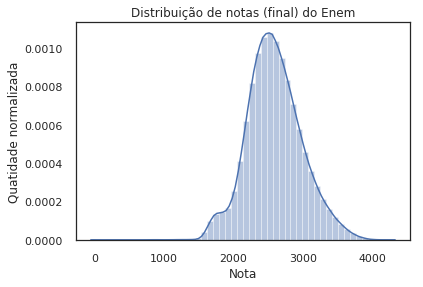

In [93]:
# solução histograma e descrição
print(enem.nota_total.describe())
sns.distplot(enem.nota_total)
plt.title("Distribuição de notas (final) do Enem")
plt.ylabel("Quatidade normalizada")
plt.xlabel("Nota")

## Pergunta: extraia 1% dos dados para explorarmos

- utilize o seed de aleatoriedade 745
- use a função `sample` para extrair 1% dos dados em uma variável chamada `enem_eda`
- plote o histograma de `enem_eda`
- descreva a `nota_total` desse sample de 1%
- a média, mediana e desvio padrão de nosso sample parecem representar o conjunto total?

Enem EDA sampling tem a distribuição


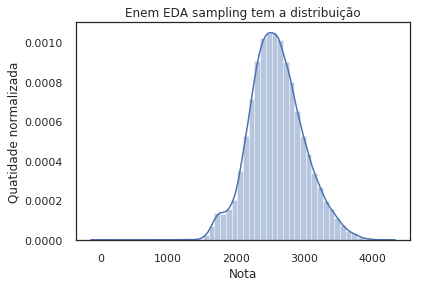

In [94]:
import matplotlib.pyplot as plt

# solução sua função de sampling


def eda_sample(enem):
    # seed
    # 1% de sample em enem_eda
    enem_eda = enem.sample(frac=0.01, random_state=745)
    print("Enem EDA sampling tem a distribuição")
    # descreva a nota_total
    enem_eda.nota_total.describe()
    # plote o histograma da nota_total e mostre com plt.show()
    sns.distplot(enem_eda.nota_total)
    plt.title("Enem EDA sampling tem a distribuição")
    plt.ylabel("Quatidade normalizada")
    plt.xlabel("Nota")
    plt.show()
    return enem_eda


enem_eda = eda_sample(enem)

## Pergunta: analise a correlação entre as notas

- inclua a `nota_total` a `todas_as_notas`
- analise a correlação entre as variáveis contidas em todas as notas (uma tabela 10x10)

Text(0.5,1,'Correlação das notas parciais com a nota final.')

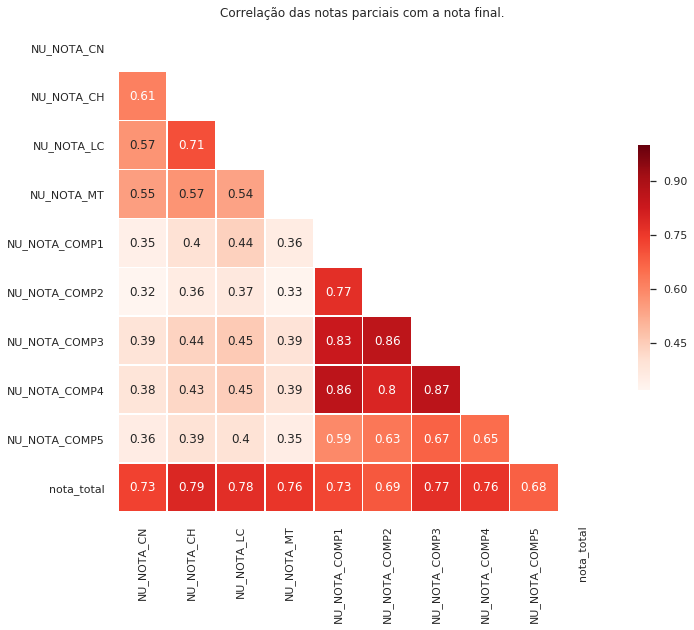

In [95]:
# solução
sns.set(style="white")

# Compute the correlation matrix
correlacoes = enem.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlacoes, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    correlacoes,
    mask=mask,
    cmap="Reds",
    annot=True,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)
plt.title("Correlação das notas parciais com a nota final.")

In [96]:
if correlacoes.shape != (10, 10):
    print(
        "A matriz de correlação deveria ser entre 10 notas, totalizando 10 linhas por 10 colunas"
    )

## Pergunta: analise a correlação da nota_total

- extraia somente a linha relativa a `nota_total`
- atribua essa tabela 1x10 a variável `correlacao_com_nota_total`
- plote um gráfico de barras horizontais com o valor da correlação de cada nota com `nota_total`
- o gráfico deve estar ordenado da correlação mais baixa no topo para a correlação mais alta no fim
- use o estilo branco de gráficos do seaborn: `sns.set(style="white")`

In [97]:
# solução: cálculo da tabela de correlação com todas as notas
correlacao_com_nota_total = correlacoes

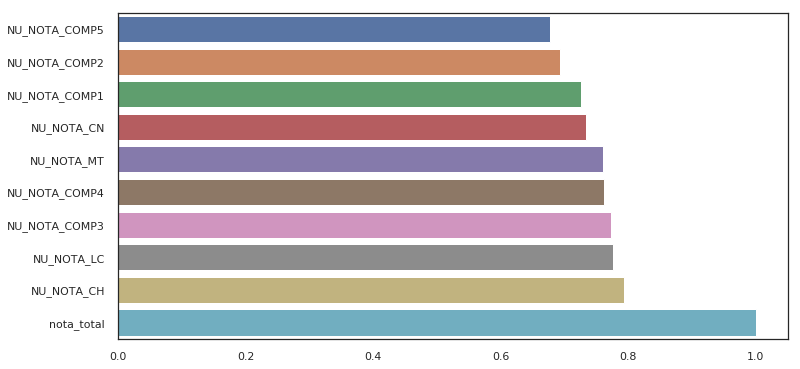

In [98]:
# solução gráfico
def plota_correlacao(serie):
    sns.set(style="white")
    plt.figure(figsize=(12, 6))
    corr = serie["nota_total"].sort_values()
    sns.barplot(y=corr.index, x=corr.values)


plota_correlacao(correlacao_com_nota_total)

## Pergunta: tente um primeiro modelo

- Alguns estudiosos indicam que matemática e línguas formam a base para a educação
- Com base nesse conhecimento prévio, utilize de `enem_eda` as colunas `NU_NOTA_MT` e `NU_NOTA_LC` e `nota_total`
- Crie uma variável chamada `interesse` com esses dados
- Crie uma função chamada `split` que recebe esses dados
    - Ela usa o seed para números aleatórios do numpy 42367
    - Ela faz um `train_test_split` com porcentagem de treino e teste padrão.
    - Ela imprime o tamanho dos conjuntos resultantes de treino e teste
    

In [99]:
# solução: definindo interesse e imprimindo os 5 primeiros elementos
interesse = enem_eda[["NU_NOTA_MT", "NU_NOTA_LC", "nota_total"]]

In [100]:
# Solução: a função de split

from sklearn.model_selection import train_test_split


def split(dados):
    # seed
    # train_test_split
    train_x, test_x, train_y, test_y = train_test_split(
        dados.drop("nota_total", axis=1),
        dados["nota_total"],
        test_size=0.2,
        random_state=42367,
    )
    print("*" * 80)
    print(
        "Quebrando em treino (x,y) e teste (x,y)",
        train_x.shape,
        train_y.shape,
        test_x.shape,
        test_y.shape,
    )
    print("Usando colunas %s como X" % str(train_x.columns.values))
    print("Desvio padrão do conjunto de testes", test_y.std())
    return train_x, test_x, train_y, test_y

In [101]:
# Código pronto

train_x, test_x, train_y, test_y = split(interesse)
if train_x.shape[1] != 2:
    print("*" * 80)
    print("Erro! Você deveria possuir somente duas colunas em X")
    print("*" * 80)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (35414, 2) (35414,) (8854, 2) (8854,)
Usando colunas ['NU_NOTA_MT' 'NU_NOTA_LC'] como X
Desvio padrão do conjunto de testes 396.6471089333877


## Pergunta: execute uma regressão linear

- defina a função `roda_regressao_linear` que recebe os 4 conjuntos de dados de treino e teste (x e y)
- treine um modelo `LinearRegression` do sklearn 
- calcule o R^2 score no conjunto de teste
- calcule o mean squared error (`mse`) e o mean absolute error (`mae`) do conjunto de teste
- imprima essas 3 métricas

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [103]:
# Solução: função para executar a regressão linear


def roda_regressao_linear(train_x, test_x, train_y, test_y):

    # crie o modelo, treine com os dados de treino
    # calcule o r2_score com os dados de teste
    # calcule a predição e os dois tipos de erros
    model = LinearRegression()
    model.fit(train_x, train_y)
    test_pred = model.predict(test_x)

    mse = mean_squared_error(test_y, test_pred)
    mae = mean_absolute_error(test_y, test_pred)
    r2 = r2_score(test_y, test_pred)

    print("*" * 80)
    print("r2 score", r2)
    print("mse", mse)
    print("mae", mae)

    return model

In [104]:
# código pronto
roda_regressao_linear(train_x, test_x, train_y, test_y)

********************************************************************************
r2 score 0.7684697385389773
mse 36422.2939537661
mae 141.98020024873023


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Pergunta: analise o erro médio absoluto

- compare o erro médio absoluto com o desvio padrão dos estudantes do conjunto de testes
- o que você achou do erro encontrado com o uso desse modelo linear?

## Solução
A relação do erro médio absoluto com o desvio padrão é de proporção direta e positiva, tendo em vista que o modelo de regressão linear tenta plotar uma reta onde o erro é distância entre os pontos e a reta. Devendo o erro ser o menor possível fica bem difícil se os pontos estiverem muito dispersos entre si, ou seja quanto maior o desvio padrão maior será o erro médio absoluto, portanto se um for alto o outro tende a ser alto também. A comparação dos valores mostra que estão coerente um tende a ser alto assim como o outro. 

## Analisando o erro

Utilizando o módulo `yellowbrick` podemos rapidamente plotar os erros encontrados para cada estudante. No eixo X estará a `nota_total` real, enquanto no eixo Y a `nota_total` prevista pelo modelo. Quanto mais próxima da diagonal de identidade (x=y), mais correta a previsão do modelo.

Quanto menor o mean absolute error menor, mais próximo da diagonal será o modelo linear.

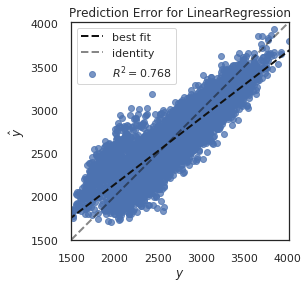

In [105]:
# código pronto

from yellowbrick.regressor import PredictionError


def visualiza_erros(train_x, train_y, test_x, test_y):
    visualizer = PredictionError(LinearRegression())
    visualizer.fit(train_x, train_y)
    visualizer.score(test_x, test_y)
    visualizer.poof()


visualiza_erros(train_x, train_y, test_x, test_y)

## Analisando o erro

Outra maneira importante de analisar o erro é ver a distribuição do resíduo, "o quão errado" nosso modelo está para os diversos valores previstos. No eixo X temos o valor previsto pelo modelo, enquanto no eixo Y o erro dessa previsão (os resíduos).

Um modelo razoável que captura a relação entre as variáveis de X e a variável dependente y comete erros de maneira "normal", isto é, seus resíduos devem seguir uma distribuição normal, mostrando não haver uma tendência para erros maiores ou menores em determinadas situações.

No gráfico a seguir você verá que a distribuição dos resíduos (gráfico da direita) se assemelham ao de uma normal.

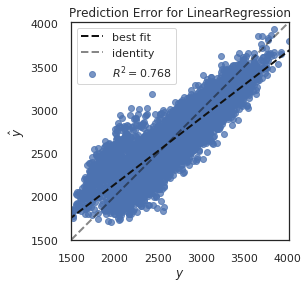

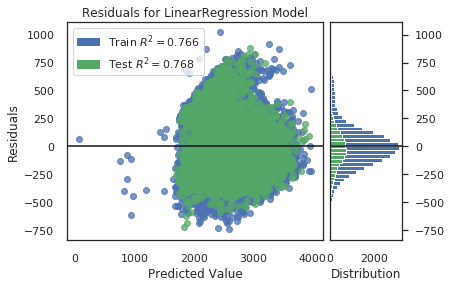

In [106]:
# código pronto

from yellowbrick.regressor import ResidualsPlot


def visualiza_erros(train_x, train_y, test_x, test_y):
    visualizer = PredictionError(LinearRegression())
    visualizer.fit(train_x, train_y)
    visualizer.score(test_x, test_y)
    visualizer.poof()

    visualizer = ResidualsPlot(LinearRegression())
    visualizer.fit(train_x, train_y)
    visualizer.score(test_x, test_y)
    visualizer.poof()


visualiza_erros(train_x, train_y, test_x, test_y)

## Explorando combinações de features

Ainda nessa fase de exploração escolhemos um conjunto de features (matemática e línguas) para tentar prever a nota final. Mas sabemos da correlação das variáveis de nota com a nota total que algumas possuem uma correlação maior do que outras.

De maneira análoga ao código anterior execute o modelo linear para diversas combinações de notas que julgar pertinente.

Para cada conjunto de notas que julgar pertinente:
- escolha as colunas e crie a variável `interesse` com elas
- invoque o `split` do `interesse`
- aplique a `run_linear_regression`
- aplique a `visualiza_erros`

Dentre os modelos a testar, verifique alguns importantes:
- com todas as 9 notas, o modelo é capaz de errar pouco? afinal a nota total é uma combinação linear de todas as 9 notas
- com 8 notas, qual o erro mínimo?
- com 1, 2 ou 3 notas que você julgar que faz sentido, quais erros encontra?

In [107]:
# código pronto
def regressao_completa_para(notas):
    interesse = enem_eda[notas]
    train_x, test_x, train_y, test_y = split(interesse)
    model = roda_regressao_linear(train_x, test_x, train_y, test_y)
    visualiza_erros(train_x, train_y, test_x, test_y)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (35414, 9) (35414,) (8854, 9) (8854,)
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_CH' 'NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP1'
 'NU_NOTA_COMP2' 'NU_NOTA_COMP3' 'NU_NOTA_COMP4' 'NU_NOTA_COMP5'] como X
Desvio padrão do conjunto de testes 396.6471089333877
********************************************************************************
r2 score 1.0
mse 4.624338079707062e-25
mae 5.53334152335139e-13


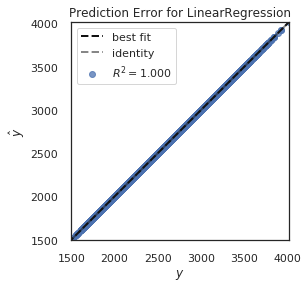

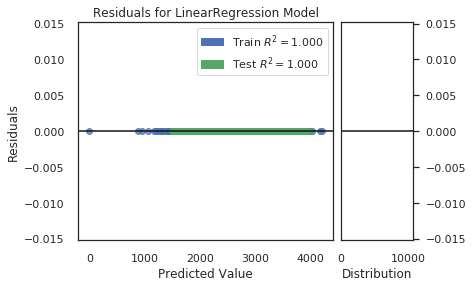

In [108]:
# solução 1: teste com todas as notas
regressao_completa_para(
    [
        "NU_NOTA_CN",
        "NU_NOTA_CH",
        "NU_NOTA_LC",
        "NU_NOTA_MT",
        "NU_NOTA_COMP1",
        "NU_NOTA_COMP2",
        "NU_NOTA_COMP3",
        "NU_NOTA_COMP4",
        "NU_NOTA_COMP5",
        "nota_total",
    ]
)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (35414, 5) (35414,) (8854, 5) (8854,)
Usando colunas ['NU_NOTA_COMP1' 'NU_NOTA_COMP2' 'NU_NOTA_COMP3' 'NU_NOTA_COMP4'
 'NU_NOTA_COMP5'] como X
Desvio padrão do conjunto de testes 396.6471089333877
********************************************************************************
r2 score 0.6705066240551306
mse 51832.98510852804
mae 183.6669791634044


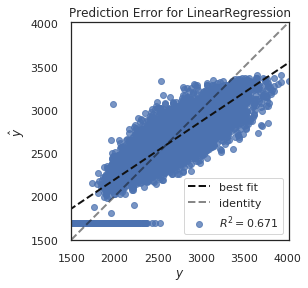

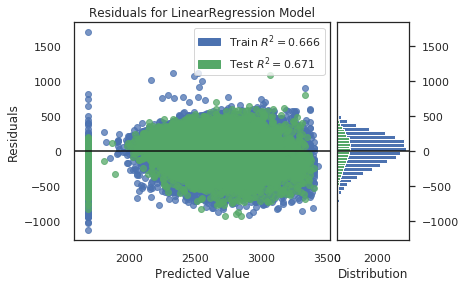

In [109]:
# solução 2: teste outra combinação
regressao_completa_para(
    [
        "NU_NOTA_COMP1",
        "NU_NOTA_COMP2",
        "NU_NOTA_COMP3",
        "NU_NOTA_COMP4",
        "NU_NOTA_COMP5",
        "nota_total",
    ]
)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (35414, 4) (35414,) (8854, 4) (8854,)
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_CH' 'NU_NOTA_LC' 'NU_NOTA_MT'] como X
Desvio padrão do conjunto de testes 396.6471089333877
********************************************************************************
r2 score 0.8462934786635695
mse 24179.751136629504
mae 109.362870623524


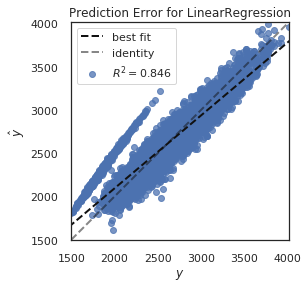

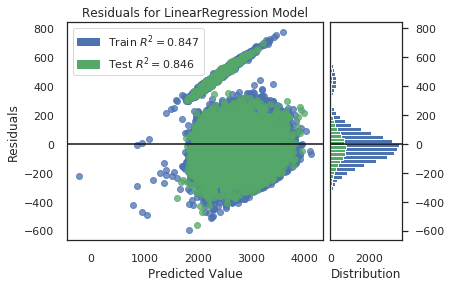

In [110]:
# solução 3: teste outra combinação
regressao_completa_para(
    ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "nota_total"]
)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (35414, 2) (35414,) (8854, 2) (8854,)
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_LC'] como X
Desvio padrão do conjunto de testes 396.6471089333877
********************************************************************************
r2 score 0.7264499122968304
mse 43032.481553520935
mae 157.10580504633526


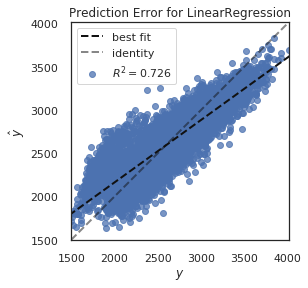

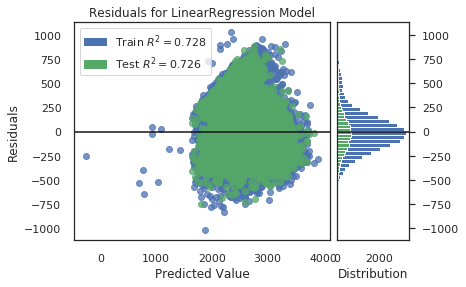

In [111]:
# solução 4: teste outra combinação
regressao_completa_para(
    ["NU_NOTA_CN", "NU_NOTA_LC", "nota_total",]
)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (35414, 2) (35414,) (8854, 2) (8854,)
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_CH'] como X
Desvio padrão do conjunto de testes 396.6471089333877
********************************************************************************
r2 score 0.7215207935080707
mse 43807.88694685634
mae 157.99184474939182


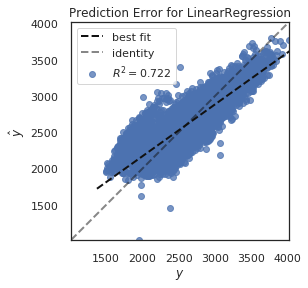

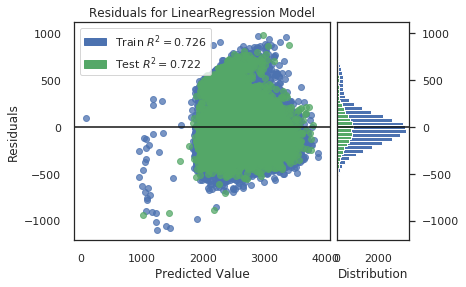

In [112]:
# solução 5: teste outra combinação
regressao_completa_para(["NU_NOTA_CN", "NU_NOTA_CH", "nota_total"])

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (35414, 2) (35414,) (8854, 2) (8854,)
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_MT'] como X
Desvio padrão do conjunto de testes 396.6471089333877
********************************************************************************
r2 score 0.7214930108874236
mse 43812.25746313197
mae 157.26256106154273


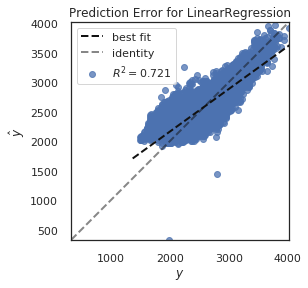

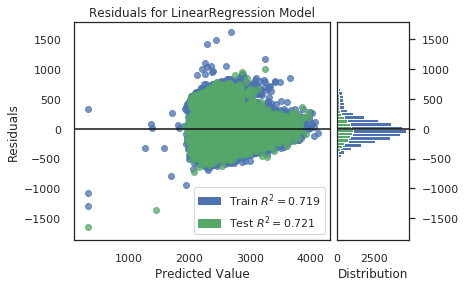

In [113]:
# solução 6: teste outra combinação
regressao_completa_para(["NU_NOTA_CN", "NU_NOTA_MT", "nota_total"])

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (35414, 3) (35414,) (8854, 3) (8854,)
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_CH' 'NU_NOTA_LC'] como X
Desvio padrão do conjunto de testes 396.6471089333877
********************************************************************************
r2 score 0.7790512656795167
mse 34757.70164708242
mae 139.04294223978474


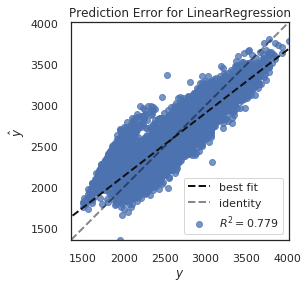

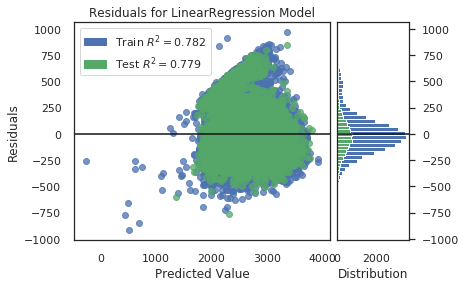

In [114]:
# solução 7: teste outra combinação
regressao_completa_para(["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "nota_total"])

## Pergunta: tente um modelo específico

- A prova de língua não envolve a criação de textos complexos, mas aborda a língua portuguesa
- A prova de matemática junto com a de língua apresenta um modelo razoável
- A prova de redação apresenta a oportunidade de criar textos complexos

Juntando essas três informações tente o mesmo processo de 4 passos para o modelo linear com `NU_NOTA_LC`, `NU_NOTA_COMP3` e `NU_NOTA_MT`. Analise o erro médio absoluto, o R^2 e a distribuição dos erros comparados aos modelos anteriores.

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (35414, 3) (35414,) (8854, 3) (8854,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_COMP3' 'NU_NOTA_MT'] como X
Desvio padrão do conjunto de testes 396.6471089333877
********************************************************************************
r2 score 0.9246894069541347
mse 11847.196735493393
mae 86.6191633803618


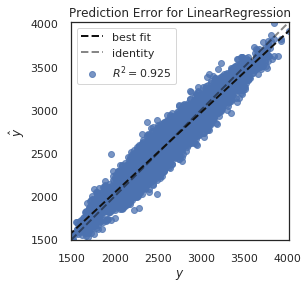

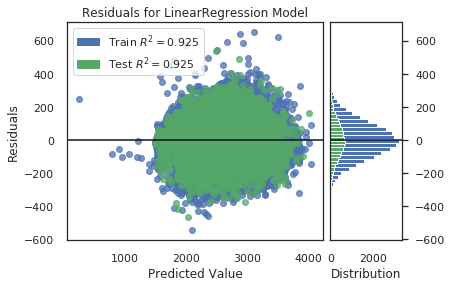

In [115]:
# solução
regressao_completa_para(["NU_NOTA_LC", "NU_NOTA_COMP3", "NU_NOTA_MT", "nota_total"])

## Escolhemos as features, qual o estimador ideal?

Vamos explorar mais ainda nosso conjunto de exploração. Vamos continuar com o conjunto de 3 notas, que seria uma possível conquista: somente com um componente de redação e 2 notas de provas seríamos capazes de prever razoavelmente a avaliação final de um aluno ou aluna.

Apesar dos gráficos anteriores indicarem que o modelo linear tem sido razoável para nossos dados, vamos testar outros estimadores. 

## Pergunta: Prepare diversos estimadores

- Implemente a função `gera_regressores` que retorna uma lista de estimadores
- Do sklearn coloque na lista:
    - `LinearRegression`
    - `Lasso`
    - `Ridge`
    - `DecisionTreeRegressor`
    - `RandomForestRegressor`

In [116]:
# solução

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


def gera_regressores():
    # gere os modelos em uma lista
    modelos = [
        LinearRegression(),
        Lasso(),
        Ridge(),
        DecisionTreeRegressor(),
        RandomForestRegressor(),
    ]
    return modelos

In [117]:
# teste

if len(gera_regressores()) != 5:
    print("Erro!!! São 5 regressores que queremos testar!")

# Pergunta: crie uma função que escolhe parte dos dados

- implemente a função `escolhe_colunas`
- ela recebe o conjunto de dados e as colunas a filtrar
- escolha somente as colunas dos dados
- chame o `split` para esses dados filtrados, separando em treino e teste, x e y
- imprima o histograma de `train_y`
- plote o gráfico com `plt.show()`
- retorne `train_x, test_x, train_y, test_y` nessa ordem

In [118]:
# solução
def escolhe_dados(dados, colunas):
    train_x, test_x, train_y, test_y = split(dados[colunas])
    sns.distplot(train_y)
    plt.show()

    return train_x, test_x, train_y, test_y

## Pergunta: treine e gere as métricas

- crie uma função para treinar e gerar as métricas de uma regressão

In [119]:
# solução:

import time


def treina_e_mede_regressor(modelo, train_x, test_x, train_y, test_y):
    tic = time.time()
    modelo.fit(train_x, train_y)
    tac = time.time()
    tempo_de_treino = tac - tic

    test_pred = modelo.predict(test_x)
    mse = mean_squared_error(test_y, test_pred)
    mae = mean_absolute_error(test_y, test_pred)

    print("Resultado", modelo, mse, mae)

    return mse, mae, tempo_de_treino

In [120]:
# código pronto

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

scaler = StandardScaler()


def analisa_regressao(dados):
    train_x, test_x, train_y, test_y = escolhe_dados(
        dados, ["NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3", "nota_total"]
    )

    scaler.fit(train_x)
    train_x = scaler.transform(train_x)

    resultados = []
    for modelo in gera_regressores():

        pipe = make_pipeline(StandardScaler(), modelo)

        mse, mae, tempo_de_treino = treina_e_mede_regressor(
            pipe, train_x, test_x, train_y, test_y
        )

        resultados.append([modelo, pipe, tempo_de_treino, mse, mae])

    resultados = pd.DataFrame(
        resultados, columns=["modelo", "pipe", "tempo_de_treino", "mse", "mae"]
    )
    return test_x, test_y, resultados

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (35414, 3) (35414,) (8854, 3) (8854,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Desvio padrão do conjunto de testes 396.6471089333877


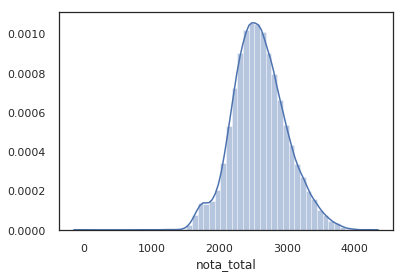

Resultado Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False) 30091721199.593758 171428.84305696137
Resultado Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lasso',
                 Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False) 29893734127.813183 170864.26353160857
Resultado Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean

,modelo,mse,mae,tempo_de_treino
0,"LinearRegression(copy_X=True, fit_intercept=Tr...",30091721199.594,171428.843,0.003
1,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",29893734127.813,170864.264,0.006
2,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",30090977306.205,171426.731,0.005
3,"DecisionTreeRegressor(ccp_alpha=0.0, criterion...",2564390.853,1561.760,0.148
4,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio...",2402406.818,1508.499,5.967


In [121]:
test_x, test_y, notas = analisa_regressao(enem_eda)
notas[["modelo", "mse", "mae", "tempo_de_treino"]]

## Resultado parcial

Somente nos nossos dados de exploração fomos capazes de perceber que um modelo de regressão linear parece ser capaz de explicar a variável `nota_total` em função de três variáveis. Por mais que a rede neural possa ter se saído um pouco melhor na métrica de `mean absolute error`, o treino é longo mesmo para 5% dos dados, que ainda estamos explorando.

Como uma regressão linear simples não possui hiper-parâmetros, nosso estudo de regressão vai parar por aqui. Possuímos indícios de que podemos usar um modelo de regressão em cima de 3 notas. Mas e no caso de identificarmos alunos e alunas para bolsa? Nesse caso não precisamos saber a nota final específica, mas sim se ela está no topo das pessoas que fizeram a prova. Isto é, o aluno ou aluna está ou não está no topo X% dos alunos?

Ao invés de usarmos uma regressão, tentaremos usar uma classificação! É comum reduzir um problema de regressão em classificação através do "encaixotamento" (binning) dos valores. Por exemplo, se o topo 25% dos alunos possuem nota maior que 2600, então quem tem menos fica com 0 e quem tem mais fica com 1. Poderíamos fazer também uma classificação entre os menores 25% (0), o bolo do meio (1) e o topo 25% (2). Como nosso cliente deseja entender o topo dos alunos e alunas vamos para a abordagem de 0 e 1.

## Pergunta: As notas de treino

- dado os últimos dados de teste gerados, gere um histograma da variável y (`nota_total` que é o `test_y`)

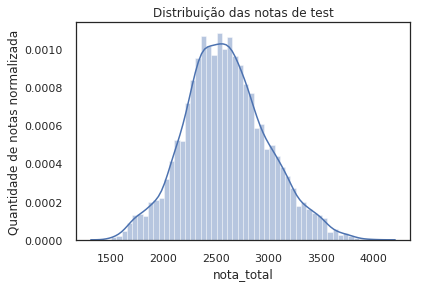

In [122]:
# solução: histograma
plt.xlabel("Nota")
plt.ylabel("Quantidade de notas normalizada")
plt.title("Distribuição das notas de test")
sns.distplot(test_y)

## Pergunta: criando as classes

- Crie uma função chamada `top_p` que recebe uma série de dados e um p que indica o quantil, por padrão 0.75
- A função devolve uma nova série
- O resultado são 0s para  quem está abaixo do quantil, e 1s para quem está acima

In [123]:
# solução


def top_p(serie, p=0.75):
    # calcule o quantil p
    quant = serie.quantile(p)
    print("quantile encontrado", quant)
    # defina y como sendo uma serie de 1s e 0s. 1 se o valor da serie for maior que o quantil, 0 se menor
    y = [1 if value > quant else 0 for value in serie]
    return pd.Series(y)

In [124]:
# teste do top 25%
top_25 = top_p(pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]), p=0.75).values
if not np.array_equal(top_25, [0, 0, 0, 0, 0, 0, 0, 1, 1, 1]):
    print("Não retornou o top 25% corretamente, deveria ser ", top_25)

quantile encontrado 7.75


In [125]:
# teste do top 10%

top_10 = top_p(pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]), p=0.90).values
if not np.array_equal(top_10, [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]):
    print("Não retornou o top 10% corretamente, deveria ser", top_10)

quantile encontrado 9.1


## Visualizando classes e features

O `yellowbrick` permite visualizar o balanço de suas classes. O código a seguir vai conferir e permitir visualizar que separamos 25% dos alunos e alunas:

In [126]:
# código pronto

y_top25 = top_p(test_y)
y_top25.mean()

quantile encontrado 2838.325


0.25005647165123107

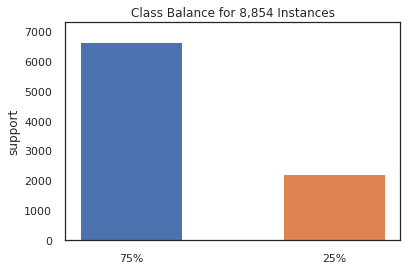

In [127]:
# código pronto

from yellowbrick.target import ClassBalance

visualizer = ClassBalance(labels=["75%", "25%"])
visualizer.fit(y_top25)
visualizer.poof()

## Para saber mais: agrupando

O `yellowbrick` possui uma função para visualizar possíveis binnings. O código a seguir mostra 4 sugestões de pontos para agrupamento. Não usaremos a sugestão do yellowbrick pois no nosso caso o cliente já definiu que queria os X% do topo.

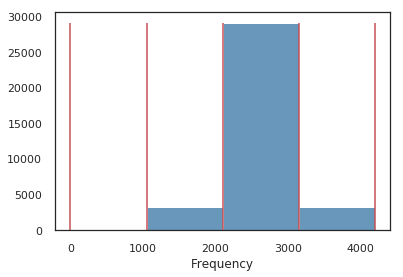

In [128]:
# código pronto

from yellowbrick.target import BalancedBinningReference

visualizer = BalancedBinningReference()
visualizer.fit(train_y)
visualizer.poof()

## O modelo completo para classificação

Vamos passar agora pelo mesmo processo de classificação.

## Pergunta: Prepare diversos estimadores

- Implemente a função `gera_classificadores` que retorna uma lista de estimadores
- Do sklearn coloque na lista:
    - `DummyClassifier` com a estratégia `most_frequent` (mais frequente) que será nosso baseline
    - `LogisticRegression`
    - `RidgeClassifier`
    - `DecisionTreeClassifier`
    - `RandomForestClassifier(n_estimators=10)`
    - `SVC`

In [129]:
# código pronto
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [130]:
# solução


def gera_classificadores():
    # defina seus modelos
    modelos = [
        DummyClassifier(strategy="most_frequent"),
        LogisticRegression(),
        RidgeClassifier(),
        DecisionTreeClassifier(),
        RandomForestClassifier(n_estimators=10),
        SVC(),
    ]
    return modelos

In [131]:
# código pronto

if len(gera_classificadores()) != 6:
    print("Erro!!! São 6 classificadores que queremos testar!")

## Pergunta: defina uma nova função de split, agora baseada nas classes

- crie a função `split_classe` que recebe os `dados`
- use `42367` como seed para o `numpy`
- X são todas as colunas exceto a coluna `top_p`
- y é a coluna `top_p`
- chame `train_test_split`
    - stratify é a coluna y
- imprima os tamanhos dos conjuntos
- imprima o número de colunas de X
- imprima a média de test_y
- retorne os conjuntos de treino e teste

In [132]:
def split_classificacao(dados):
    # faça o seed do numpy
    np.random.seed(42367)
    # defina X como todas as colunas de `dados` exceto top_p
    X = dados.drop("top_p", axis=1)
    # defina y como somente a coluna top_p
    Y = dados["top_p"]
    # quebre em treino e teste, usando estratificação baseada em y
    train_x, train_y, test_x, test_y = train_test_split(X, Y, stratify=Y)
    print("*" * 80)
    print(
        "Quebrando em treino (x,y) e teste (x,y)",
        train_x.shape,
        train_y.shape,
        test_x.shape,
        test_y.shape,
    )
    print("Usando colunas %s como X" % str(train_x.columns.values))
    print("Média do conjunto de testes", test_y.mean())
    return train_x, test_x, train_y, test_y

## Testando sua função de split

In [133]:
# código pronto: teste

interesse = enem_eda[["nota_total", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]]
interesse["top_p"] = list(top_p(interesse["nota_total"]))
interesse = interesse[["top_p", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]]

train_x, test_x, train_y, test_y = split_classificacao(interesse)

if train_x.shape[1] != 3:
    print("*" * 80)
    print("Erro! Você deveria possuir somente três colunas em X")
    print("*" * 80)

if test_y.mean() <= 0.24 or test_y.mean() >= 0.26:
    print("*" * 80)
    print(
        "Erro! Você deveria capturar somente o top 25% e usar estratificação no split"
    )
    print("*" * 80)

quantile encontrado 2841.625
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (11067, 3) (33201,) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2500225896810337


## Pergunta: implemente o treino e o teste do classificador

In [134]:
# solução:

import time


def treina_e_mede_classificador(pipe, nome, train_x, test_x, train_y, test_y):
    tic = time.time()
    pipe.fit(train_x, train_y)
    tac = time.time()
    tempo_de_treino = tac - tic

    # calcule a accuracy_score
    accuracy_score = pipe.score(test_x, test_y)
    print("Resultado", nome, accuracy_score)

    return accuracy_score, tempo_de_treino

## Pergunta implemente a função de escolha de dados e split para classificação

In [135]:
# solução:


def escolhe_dados_para_classificacao(dados, colunas, p):
    interesse = dados[colunas].drop("nota_total", axis=1)
    nota_total = dados["nota_total"]
    interesse["top_p"] = list(top_p(nota_total, p))

    colunas.remove("nota_total")
    interesse = interesse[[*colunas, "top_p"]]

    train_x, train_y, test_x, test_y = split_classificacao(interesse)
    train_y.hist()
    plt.show()
    return train_x, test_x, train_y, test_y

quantile encontrado 2841.625
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (11067, 3) (33201,) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2500225896810337


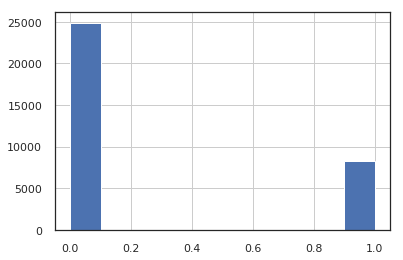

In [136]:
# testando a escolha

train_x, test_x, train_y, test_y = escolhe_dados_para_classificacao(
    enem_eda, ["nota_total", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"], p=0.75
)

if train_x.shape[1] != 3:
    print("*" * 80)
    print("Erro! Você deveria possuir somente três colunas em X")
    print("*" * 80)

if test_y.mean() <= 0.24 or test_y.mean() >= 0.26:
    print("*" * 80)
    print(
        "Erro! Você deveria capturar somente o top 25% e usar estratificação no split"
    )
    print("*" * 80)

In [137]:
# código pronto


def analisa_classificacao(dados, p=0.75):

    colunas = ["nota_total", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]
    train_x, test_x, train_y, test_y = escolhe_dados_para_classificacao(
        dados, colunas, p=p
    )

    resultados = []
    for modelo in gera_classificadores():
        nome = type(modelo).__name__
        pipe = make_pipeline(StandardScaler(), modelo)
        accuracy_score, tempo_de_treino = treina_e_mede_classificador(
            pipe, nome, train_x, test_x, train_y, test_y
        )
        resultados.append([nome, modelo, pipe, tempo_de_treino, accuracy_score])

    resultados = pd.DataFrame(
        resultados,
        columns=["tipo", "modelo", "pipe", "tempo_de_treino", "accuracy_score"],
    )
    return test_x, test_y, resultados.set_index("tipo")

## Pergunta: rode a analisa_classificacao

- rode 6 vezes, cada uma em uma célular diferente, vamos ver o quão bem os modelos tentam prever o top X%
- queremos o top 25% (quantil/p=0.75), top 20%, top 10%, top 5% e top 1%
- queremos também rodar para as últimas 25% pessoas, isto é p=0.25

quantile encontrado 2841.625
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (11067, 3) (33201,) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2500225896810337


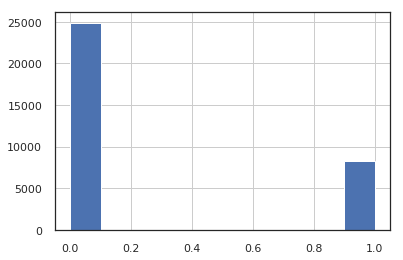

Resultado DummyClassifier 0.7499774103189663
Resultado LogisticRegression 0.9371103280021686
Resultado RidgeClassifier 0.9204843227613626
Resultado DecisionTreeClassifier 0.9070208728652751
Resultado RandomForestClassifier 0.9260865636577211
Resultado SVC 0.9374717628987078


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.750,0.004
LogisticRegression,0.937,0.062
RidgeClassifier,0.920,0.016
DecisionTreeClassifier,0.907,0.108
RandomForestClassifier,0.926,0.174
SVC,0.937,5.292


In [138]:
# solução top 25%
notas = analisa_classificacao(enem_eda)[2]
# rode a analisa_classificacao e armazene test_x, test_y e notas
notas[["accuracy_score", "tempo_de_treino"]]

quantile encontrado 2274.3
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (11067, 3) (33201,) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.7999457847655191


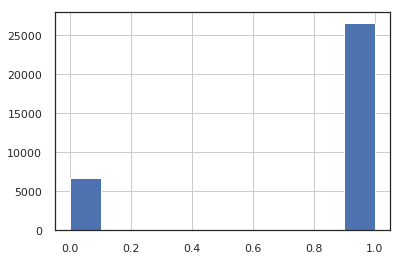

Resultado DummyClassifier 0.7999457847655191
Resultado LogisticRegression 0.9343092075539894
Resultado RidgeClassifier 0.9073823077618144
Resultado DecisionTreeClassifier 0.9044908285895004
Resultado RandomForestClassifier 0.9233758019336767
Resultado SVC 0.9335863377609108


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.800,0.004
LogisticRegression,0.934,0.054
RidgeClassifier,0.907,0.017
DecisionTreeClassifier,0.904,0.109
RandomForestClassifier,0.923,0.182
SVC,0.934,5.956


In [139]:
# solução top 20%
notas = analisa_classificacao(enem_eda, 0.2)[2]
# rode a analisa_classificacao e armazene test_x, test_y e notas
notas[["accuracy_score", "tempo_de_treino"]]

quantile encontrado 2119.2
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (11067, 3) (33201,) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.8999728923827596


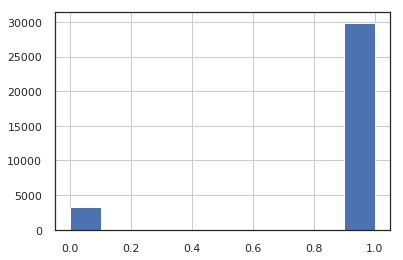

Resultado DummyClassifier 0.8999728923827596
Resultado LogisticRegression 0.9637661516219391
Resultado RidgeClassifier 0.9471401463811331
Resultado DecisionTreeClassifier 0.9503027017258516
Resultado RandomForestClassifier 0.9593385741393331
Resultado SVC 0.9636757928978043


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.900,0.003
LogisticRegression,0.964,0.069
RidgeClassifier,0.947,0.017
DecisionTreeClassifier,0.950,0.110
RandomForestClassifier,0.959,0.150
SVC,0.964,3.257


In [140]:
# solução top 10%
notas = analisa_classificacao(enem_eda, 0.1)[2]
# rode a analisa_classificacao e armazene test_x, test_y e notas
notas[["accuracy_score", "tempo_de_treino"]]

quantile encontrado 1964.0700000000002
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (11067, 3) (33201,) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.9499412668293123


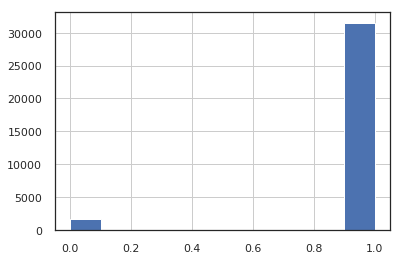

Resultado DummyClassifier 0.9499412668293123
Resultado LogisticRegression 0.9861751152073732
Resultado RidgeClassifier 0.9499412668293123
Resultado DecisionTreeClassifier 0.9793078521731273
Resultado RandomForestClassifier 0.9826511249661155
Resultado SVC 0.9856329628625644


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.950,0.003
LogisticRegression,0.986,0.078
RidgeClassifier,0.950,0.019
DecisionTreeClassifier,0.979,0.087
RandomForestClassifier,0.983,0.130
SVC,0.986,1.319


In [141]:
# solução top 5%
notas = analisa_classificacao(enem_eda, 0.05)[2]
# rode a analisa_classificacao e armazene test_x, test_y e notas
notas[["accuracy_score", "tempo_de_treino"]]

quantile encontrado 1693.069
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (11067, 3) (33201,) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.9899701816210356


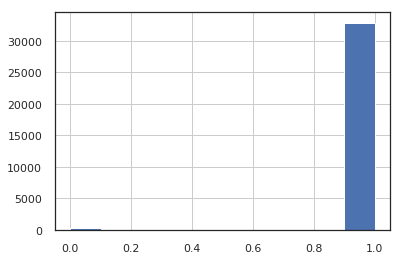

Resultado DummyClassifier 0.9899701816210356
Resultado LogisticRegression 0.9935845305864281
Resultado RidgeClassifier 0.9899701816210356
Resultado DecisionTreeClassifier 0.9903316165175747
Resultado RandomForestClassifier 0.9912352037589229
Resultado SVC 0.9938556067588326


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.990,0.003
LogisticRegression,0.994,0.076
RidgeClassifier,0.990,0.013
DecisionTreeClassifier,0.990,0.071
RandomForestClassifier,0.991,0.111
SVC,0.994,0.683


In [142]:
# solução top 1%
notas = analisa_classificacao(enem_eda, 0.01)[2]
# rode a analisa_classificacao e armazene test_x, test_y e notas
notas[["accuracy_score", "tempo_de_treino"]]

quantile encontrado 2330.475
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (11067, 3) (33201,) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.7499774103189663


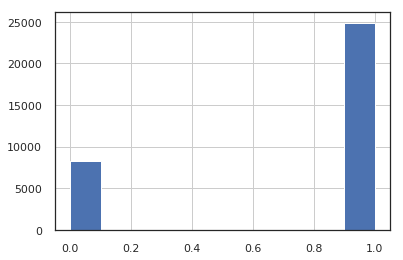

Resultado DummyClassifier 0.7499774103189663
Resultado LogisticRegression 0.9208457576579019
Resultado RidgeClassifier 0.9033161651757478
Resultado DecisionTreeClassifier 0.8882262582452336
Resultado RandomForestClassifier 0.9027740128309388
Resultado SVC 0.9225625734164633


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.750,0.004
LogisticRegression,0.921,0.059
RidgeClassifier,0.903,0.014
DecisionTreeClassifier,0.888,0.122
RandomForestClassifier,0.903,0.186
SVC,0.923,6.582


In [143]:
# solução bottom 25%
notas = analisa_classificacao(enem_eda, 0.25)[2]
# rode a analisa_classificacao e armazene test_x, test_y e notas
notas[["accuracy_score", "tempo_de_treino"]]

## Escolhendo o top 25%

Dado o cenário de topo 25%, o DummyClassifier acertou 75% das vezes, errou 25%. O modelo que estamos criando conseguiria atingir no máximo esses 25% a mais de acerto (máximo de 100%). Se conferirmos que o modelo logístico acertou 93.7%, isso significa que 93.7% - 75% = 18.7%. Portanto do ganho máximo de 25% o modelo está acertando 18.7%, um total de 74.8% de ganho do potencial máximo de um modelo.

Por mais que pareça pouco, esses 18.7% representam quase 3/4 de todo o ganho potencial que um modelo pode ter.

Você pode fazer a mesma conta paa os outros ps, lembrando que essa não é uma métrica comum de se analisar. Na prática queremos entender agora como foi que o modelo errou. Ele errou os casos do bottom 75% e do top 25% igualmente? Ou errou mais em um dos dois casos?

quantile encontrado 2330.475
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (11067, 3) (33201,) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.7499774103189663


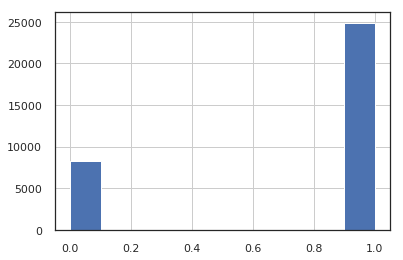

Resultado DummyClassifier 0.7499774103189663
Resultado LogisticRegression 0.9208457576579019
Resultado RidgeClassifier 0.9033161651757478
Resultado DecisionTreeClassifier 0.8882262582452336
Resultado RandomForestClassifier 0.9027740128309388
Resultado SVC 0.9225625734164633


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.750,0.003
LogisticRegression,0.921,0.059
RidgeClassifier,0.903,0.019
DecisionTreeClassifier,0.888,0.118
RandomForestClassifier,0.903,0.179
SVC,0.923,6.684


In [144]:
# código pronto: rodando para top 25%
test_x, test_y, notas = analisa_classificacao(enem_eda, 0.25)
# rode a analisa_classificacao e armazene test_x, test_y e notas de 25%
notas[["accuracy_score", "tempo_de_treino"]]

## Plotando a matriz de confusão

Vamos ver quantas vezes os dois principais modelos (Regressão logística e SVC) acertam e erram. Para isso plotaremos a matriz de confusão (código pronto).

In [145]:
# código pronto

import itertools
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(cm):

    classes = ["Não topo 25%", "Topo 25%"]

    cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] * 100

    plt.figure()
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    plt.title("Matriz de confusão normalizada")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j,
            i,
            format(cm[i, j], ".2f") + "%",
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black",
        )

    plt.ylabel("Classe real")
    plt.xlabel("Classe predita")
    plt.tight_layout()
    plt.show()


def print_confusion_for(test_x, test_y, model):
    pred_y = model.predict(test_x)
    print("Acurácia do modelo em teste", model.score(test_x, test_y))
    cnf_matrix = confusion_matrix(test_y, pred_y)

    plot_confusion_matrix(cnf_matrix)

Acurácia do modelo em teste 0.9208457576579019


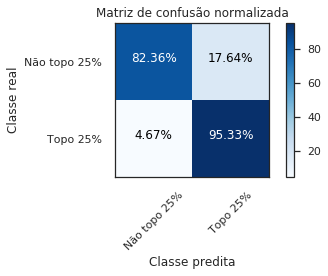

In [146]:
# código pronto

print_confusion_for(test_x, test_y, notas.loc["LogisticRegression"]["pipe"])

Acurácia do modelo em teste 0.7499774103189663


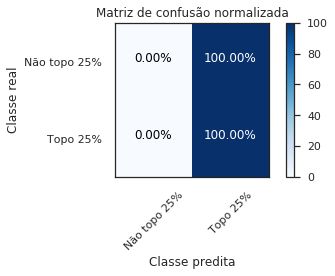

In [147]:
print_confusion_for(test_x, test_y, notas.loc["DummyClassifier"]["pipe"])

Acurácia do modelo em teste 0.9225625734164633


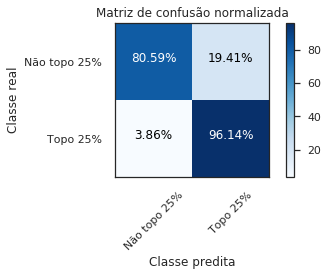

In [148]:
# código pronto

print_confusion_for(test_x, test_y, notas.loc["SVC"]["pipe"])

# Vamos validar?

Como o algoritmo de regressão logística simples obteve resultados bons, assim como o de SVC, podemos analisar a matriz de confusão para fazer a escolha. Repare que a regressão logística apresenta maior taxa de acerto no topo 25%, portanto vamos mantê-la.

Como escolhemos uma regressão logística, não possuimos um hiperparâmetro para otimizar, e vamos direto validar o modelo que treinamos. Primeiro separaremos os dados para validação.

In [149]:
# código pronto: separando os dados não usados para treino (que foram os usados em eda)

usados_no_eda = enem_eda.index
a_usar = ~enem.index.isin(usados_no_eda)
enem_validacao = enem[a_usar]
print("Para otimização temos %d elementos" % len(enem_validacao))
del a_usar
del usados_no_eda

Para otimização temos 4382487 elementos


## Pergunta: separe os dados adequadamente de validação

- implemente a função `separa_dados_de_classificacao_para_validacao`
- X são todas as 3 colunas originais da análise
- Y é o `top_p` indicando se aquele aluno ou aluna está no top 25% baseado em sua `nota_total`
- imprima a média do conjunto Y
- retorne `X, y`

In [150]:
def separa_dados_de_classificacao_para_validacao(dados):
    X = dados[["NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]]
    y = pd.Series(list(top_p(dados["nota_total"])))
    print("Média da validação", y.mean())
    return X, y

## Pergunta: defina uma função de validação cruzada de um modelo de classificação

- implemente a função `treina_e_valida_modelo_de_classificacao` que recebe os dados e o modelo
- separe os dados em X e y usando `separa_dados_de_classificacao_para_validacao`
- rode um cross_val_score com o pipe, 5 folds de validação cruzada estratificada
- imprima a acurácia encontrada na validação cruzada
- faça o treinamento do modelo
- imprima a matriz de confusão do `modelo` para `X` e `y`

Dicas:
- na validação cruzada, utilize o parâmetro `verbose=1` pois o processo pode levar alguns minutos
- na validação cruzada, utilize o parâmetro `n_jobs=-1` para usar todos os processadores possíveis de seu computador

In [151]:
# solução

from sklearn.model_selection import cross_val_score


def treina_e_valida_modelo_de_classificacao(dados, modelo):
    # calcule X e y usando a função anterior
    X, y = separa_dados_de_classificacao_para_validacao(dados)
    scores = cross_val_score(modelo, X, y, cv=5)
    mean = scores.mean()
    std = scores.std()
    print("Acurácia entre [%.2f,%.2f]" % (100 * mean - 2 * std, 100 * mean + 2 * std))

    modelo.fit(X, y)
    print_confusion_for(X, y, modelo)

quantile encontrado 2839.5
Média da validação 0.24992658278278979
Acurácia entre [93.49,93.49]
Acurácia do modelo em teste 0.9350234239143208


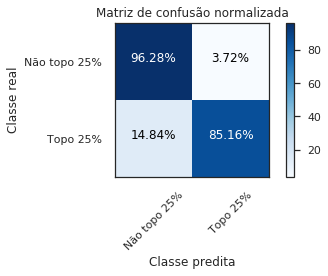

In [152]:
pipeline_logistica = make_pipeline(StandardScaler(), LogisticRegression())
treina_e_valida_modelo_de_classificacao(enem_validacao, pipeline_logistica)

## Cross validation e a matriz de confusão

Os dois resultados vão dar uma ideia do quão bom seu modelo será no mundo real.

## Lembrei de uma coisinha...

É **muito** comum no mundo real chegarmos em um resultado pior que nosso baseline. Nesses dados conseguimos um modelo razoável, mas mesmo assim também é **bem** comum, no final do processo de modelagem, lembrar de um outro tipo de modelo de base que poderíamos usar de comparação. Qual heurística simples poderia nos dizer quem vai estar nos top 25%? Repara que essa pergunta deve ser feita **antes** de se começar o projeto. Mas mesmo assim é muito comum somente próximo ao fim do projeto, agora entendendo melhor nosso conjunto de dados, chegar a ideias de heurísticas simples e poderosas que poderiam ser melhores que um modelo complexo. Infelizmente isso também pode acontecer com uma frequencia razoável. Temos que entender que faz parte: testamos heurísticas antes (como o DummyClassifier) e em qualquer momento que vierem a cabeça.

Vamos então testar uma delas?

Se soment sabemos as 3 notas de um aluno ou aluna, será que quem está no top 25% dessas 3 notas serão as pessoas que estarão no top 25% de todas as notas? Parece ser algo razoável de se imaginar como verdadeiro. Vamos então criar o **nosso estimador**! É normal "suar frio" nesse instante, será que a heurística - que parece fazer sentido - será melhor que o modelo?

## Pergunta: Implementando nosso estimador

Vamos implementar uma classe com diversas funções que todos os estimadores devem possuir. Ao treinar nosso estimador ele olha todos os alunos de treino e calcula a nota que separa o top 25%. Ao validar ele usa essa nota: se o aluno ou aluna tem uma nota maior que a nota de corte, é top 25% (1), caso contrário não é (0).

- Implemente a função `fit`. Ela recebe em X as 3 colunas que desejamos somar e deve calcular qual é o quantil de top 25%
- Implemente a função `predict`. Ela recebe X com as 3 colunas, calcula a soma delas e verifica quem está acima do quantil. Quem está acima é classificada como 1, quem está abaixo como 0
- Implemente a função `score`. Ela calcula a acurácia usando a função `accuracy_score` e as predições que o próprio estimador fez
- A função `get_params` não devolve nada uma vez que nosso estimador não possue paramêtros a serem otimizados

In [153]:
# solução: implemente o código que falta
from sklearn.metrics import accuracy_score


class HeuristicaTop25:
    def fit(self, X, y=None):
        if X.shape[1] != 3:
            print("Erro!!! Estávamos esperando 3 colunas!")
        parcial = X.sum(axis=1)
        self.top_25_quantile = pd.Series(parcial).quantile(0.75)
        print("top 25 quantile é %.2f" % self.top_25_quantile)
        return self

    def predict(self, X, y=None):
        parcial = X.sum(axis=1)
        y_pred_true_false = [
            True if value >= self.top_25_quantile else False for value in parcial
        ]  # compare a soma parcial com o self.top25_quantile
        y_pred = [
            1 if value else 0 for value in y_pred_true_false
        ]  # 1 se for maior ou igual, 0 caso contrário
        return y_pred

    def score(self, X, y=None):
        return accuracy_score(y, self.predict(X, y))

    def get_params(self, deep=True):
        return {}

quantile encontrado 2839.5
Média da validação 0.24992658278278979
top 25 quantile é 1239.80
top 25 quantile é 1246.50
top 25 quantile é 1243.80
top 25 quantile é 1253.00
top 25 quantile é 1256.20
Acurácia entre [91.87,91.91]
top 25 quantile é 1247.90
Acurácia do modelo em teste 0.918451555018874


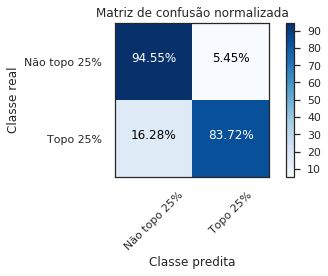

In [154]:
treina_e_valida_modelo_de_classificacao(enem_validacao, HeuristicaTop25())

## Pergunta: Compare os resultados  da acurácia e da matriz de confusão entre (a) heurística final com (b) o DummyClassifier e (c) a LogisticRegression

### Solução:

- O nosso resultado do modelo C (LogisticRegression) teve a melhor acurácia com 92%, praticamente a mesma coisa que o modelo A (HeurísticaTop25) com 91.8% e por fim o modelo B (Dummy Classifier) com 75%.
- O modelo A foi quem melhor acertou a classe 'Não topo 25%' com 94.5%. Comparando com o modelo C que acertou 82.36%, já o Dummy com a estrátegia do most_frequent está com 0% de acerto o que é esperado pois ele está considerando que todo mundo pertence a classe 'Topo 25%'.
- O Modelo B é o vencedor em acerto da classe 'Topo 25%' com 100%, afinal ele considera tudo como esta classe, se desconsideramor ele o modelo que mais acertou a classe foi o modelo C com 95.3% de acertos, e por fim o modelo A com 83.7%.

## Pergunta: Sugira uma outra heurística que poderia ser usada para tentar detectar facilmente o top 25%, sem a necessidade de um modelo complexo

### Solução

    Basicamente podemos olhar nosso conjunto de dados e encontrar o valor exato que seja a divisão de quem está no top 25% ou não está no top 25%, o terceiro quartil. Com este valor identificado podemos apenas verificar se a nota do aluno está no top 25% ou não.

## Pergunta: Se uma faculdade oferecer bolsa somente para quem o modelo julgar estar no top 25% o que acontece quando ele julga errôneamente que alguém não está no top 25%? E se julgar errôneamente que está no top 25%?

### Solução
    Se ele julgar alguem que não está no top 25% como está no top 25% a empresa está dando uma bolsa para alguem que não deveria recebe-la pelas regras, o que não é legal mas não seria um grande problema. Porém caso a empresa negue uma bolsa para alguem que deveria receber o impacto da imagem da mesma poderia ser bem maior do que a parte financeira. Se tiver que escolher um 'erro', melhor escolher o erro de julgar errôneamente que alguem está no top 25%.

## Para saber mais

Essa seção serve para instigar sua curiosidade em possíveis caminhos que queira ler e se aprofundar, todos ligados ao projeto atual. Nenhum deles é obrigatório para o projeto em si.

### TRI 

Na prática a prova do Enem já usa métodos estatísticos para entender as dificuldades de suas questões e balanceá-las de diversas maneiras. A Teoria de Resposta ao Item (IRT em inglês) é uma das abordagens usadas para analisar e adaptar questões e provas. No Brasil diversas empresas e startups usam a tecnologia para entender as dificuldades e facilidades que pessoas possuem, com o objetivo de otimizar o estudo das mesmas.

### E no ano seguinte?

Devido ao TRI podemos esperar uma certa uniformidade entre provas aplicadas em anos diferentes. Mas fica a questão: estamos treinando agora nosso modelo com X% dos alunos que fizeram a prova em um ano X, portanto precisaríamos que X% dos alunos fizessem a prova completa para termos um modelo capaz de julgar somente a partir das provas parciais: não removemos a necessidade de criação da prova. Imaginando que grande parte do custo está na distribuição e correção manual da redação, existe muita margem para otimização.

Uma outra abordagem seria treinar o modelo nos dados de um ano anterior a X e ver se o modelo se comporta bem para todos os anos posteriores. Repare como a definição do processo de separação dos dados de treino (por %? por ano?) e de validação faz muita diferença em entender como podemos usar o modelo no mundo real.

### 25%?

Nossa heurística envolveu usar o top 25%, mas poderíamos testar com os top 30% das notas parciais se seriam os top 25% das notas totais. Estaríamos errando mais para um lado do que para o outro, e isso pode ser aceitável por nosso cliente. Poderíamos continuar com a modelagem, criando um hiper parâmetro em nosso modelo e tentando otimizá-lo, por exemplo, a medida que conversamos com a empresa cliente

### Redes neurais

Neste projeto não usamos redes neurais (TensorFlow, Keras, Pytorch etc) mas é outro tipo de classificador, assim como AdaBoost e outros que poderiam ser utilizados. Como o conjunto de dados é bem grande e o relacionamento entre as notas é linear (sabemos que a nota total é a soma das notas parciais, mas não sabemos a relação entre as notas que não usamos), os modelos mais simples foram capazes de pegar boa parte do padrão encontrando nos resultados finais.


### Classes balanceadas

Se usamos 75% e 25% existe um desbalanceamento das classes e isso bagunça nossas métricas e análises. O mesmo ocorreria com 3 ou mais classes distintas. Existem diversas abordagens para tentar corrigir isso. Uma delas é simplesmente remover parte dos dados da classe que está aparecendo "demais". Isto é, dos 75%, joga uma parte aleatória fora (ou usa outros métodos para criar/remover samples). O código a seguir é um exemplo de como balancear através de jogar fora dados aleatoriamente. Dado os dados já com a coluna `top_p` ele vai balancear para 50% 50% as classes:

```
from imblearn.under_sampling import RandomUnderSampler

def random_under_sampler(dados):
    X = dados.drop('top_p', axis=1)
    y = dados['top_p']
    X_under, y_under = RandomUnderSampler(random_state=0).fit_resample(X, y)
    X_under = pd.DataFrame(X_under, columns=X.columns)
    X_under['top_p'] = y_under
    return X_under
```

Teríamos que levar em consideração que o DummyClassifier passaria a acertar agora somente 50% dos casos, pois as duas classes aparecem proporcionalmente.

# Parabéns, você concluiu o projeto da Alura!

=D